<h1>👩‍💻 Denise do Rocio Maciel</h1>
<h1> Bootcamp - IA</h1>

# 📑 Sumário

- [👩‍💻 Seção 1 – Entendimento do negócio](#sec-business)
- [📂 Seção 2 – Processamento de dados](#sec-understanding)
- [🧠 Seção 3 – Modelagem](#sec-modeling)
- [📈 Seção 4 – Avaliação de Resultados](#sec-results)

In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [66]:

df_temperatura = pd.read_csv(
    '/kaggle/input/colunatemperaturacsv/colunaTemperatura.csv', header=None
)
df = pd.read_csv(
    '/kaggle/input/csvgoogledrive/bootcamp_train - bootcamp_train.csv',
)
df['temperatura'] = df_temperatura.iloc[:, 0]

<details id="sec-business">
  <summary><h1>👩‍💻 SEÇÃO 1 – ENTENDIMENTO DO NEGÓCIO</h1></summary>
</details>

In [ ]:

O aço inoxidável é amplamente utilizado devido à sua resistência à corrosão, durabilidade e aparência estética. Ele aparece em diversos setores, incluindo:
- Construção civil e arquitetura
- Indústria alimentícia
- Setor médico e hospitalar
- Transporte
- Energia e indústria pesada
- Bens de consumo (incluindo celulares e notebooks)
- Tratamento de água de saneamento
  

Falhas no processo de produção do aço podem gerar danos que vão muito além do prejuízo econômico direto, afetando a segurança, a imagem da empresa e até resultando em processos judiciais sérios. Estimativas conservadoras apontam que entre 5% e 15% da produção de aço pode ser comprometida por falhas se não houver controle automatizado. Em uma indústria de grande porte, isso pode representar milhões de reais por mês em perdas diretas.


<details id="sec-understanding">
  <summary><h1>📊 SEÇÃO 2 – PROCESSAMENTO DOS DADOS</h1></summary>
Conteúdo da análise exploratória aqui.
</details>

Inicialmente verificaremos alguns dados e colunas para conhecimento de nossa base de dados e verificação da consistência entre ambas

In [67]:
df.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,362.000,3.068,125,FALSE,0,False,FALSE,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,294.000,1.441,115,FALSE,FALSE,False,TRUE,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-1.879,1.000,42,FALSE,FALSE,True,FALSE,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-416.000,8.223,115,FALSE,FALSE,True,FALSE,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-2.096,2.083,90,FALSE,TRUE,False,FALSE,Não,False,Não


In [68]:
df.describe()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_bordas_x,indice_de_bordas_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
count,3390.000000,3390.000000,3334.00000,3.390000e+03,3.390000e+03,3390.0,3390.000000,3390.000000,3390.000000,3.290000e+03,...,3390.000000,3390.000000,3331.000000,3390.000000,3390.000000,3390.000000,3390.000000,3340.000000,3390.000000,3390.000000
mean,1694.500000,995.507375,605.90012,2.692640e+06,1.592301e+06,100.0,1566.317699,66.733923,47.261062,1.931079e+05,...,31.903177,24.475671,0.589012,2.587066,15.272150,13.229921,2.180650,-129.129671,28.841729,171.763422
std,978.753033,1796.737709,548.07724,5.625693e+06,1.821345e+06,0.0,4337.683975,195.092105,336.794632,4.549965e+05,...,132.532692,123.669766,0.480665,5.192823,90.565798,85.717891,234.261323,301.994000,113.798868,272.952080
min,0.000000,-11.000000,-186.00000,-2.000000e+01,-1.660000e+02,100.0,-206.000000,-229.000000,-194.000000,2.550000e+02,...,0.200000,0.250000,0.000000,1.000000,1.000000,0.000000,-991.000000,-999.000000,0.140000,0.000000
25%,847.250000,41.000000,179.00000,3.934352e+05,3.407380e+05,100.0,68.000000,12.000000,11.000000,9.514500e+03,...,2.245750,1.000000,0.000000,1.934500,1.146100,1.204100,-3.539500,-96.250000,1.384000,71.000000
50%,1694.500000,614.000000,544.00000,1.265462e+06,1.128297e+06,100.0,142.000000,22.000000,21.000000,1.783600e+04,...,5.588000,1.000000,1.000000,2.227900,1.462400,1.462400,0.550000,-2.032000,2.806000,93.000000
75%,2541.750000,1187.500000,1090.00000,2.555025e+06,2.184335e+06,100.0,524.750000,58.000000,56.000000,6.797800e+04,...,7.273000,7.059000,1.000000,2.847900,2.639500,1.869200,5.605750,-1.415000,6.173000,111.000000
max,3389.000000,15266.000000,1713.00000,1.041366e+08,1.291709e+07,100.0,152655.000000,1275.000000,18152.000000,1.159141e+07,...,975.000000,992.000000,1.000000,301.000000,699.000000,699.000000,993.000000,979.000000,999.000000,2086.000000


Removeremos as colunas indice de variacao x e y porque tratam da dispersão dos pixels, e, ao menos para momento, não melhoraremos o processo de processamento de imagens. A coluna peso da placa será removida porque o desvio padrão não apresenta alterações. Já a coluna id será removida porque observou-se ser um id único por linha. 

In [69]:
df = df.drop('peso_da_placa', axis=1)
df = df.drop('id', axis=1)
df = df.drop('indice_de_variacao_x', axis=1)
df = df.drop('indice_de_variacao_y', axis=1)


Importante observar que alguns campos como espesura da chapa de aço e área apresentam valores negativos. Continuaremos as análises para considerar a exclusão desses campos.
Adicionalmente, os campos de índice de orientação e tamanho da esteira de transporte não possuem contribuição significativa para nosso objetivo.

In [70]:
print("Dataframe de treinamento - dfTrain")
print("SHAPE:",df.shape, "\n")
print("DATA TYPE:\n",df.dtypes,"\n")

Dataframe de treinamento - dfTrain
SHAPE: (3390, 35) 

DATA TYPE:
 x_minimo                          int64
x_maximo                        float64
y_minimo                          int64
y_maximo                          int64
area_pixels                       int64
perimetro_x                       int64
perimetro_y                       int64
soma_da_luminosidade            float64
maximo_da_luminosidade          float64
comprimento_do_transportador      int64
tipo_do_aço_A300                 object
tipo_do_aço_A400                 object
espessura_da_chapa_de_aço       float64
temperatura                       int64
index_de_bordas                 float64
index_vazio                     float64
index_quadrado                  float64
index_externo_x                 float64
indice_de_bordas_x              float64
indice_de_bordas_y              float64
indice_global_externo           float64
log_das_areas                   float64
log_indice_x                    float64
log_indice_y 

In [71]:
df.isnull().sum()[df.isnull().sum() > 0]

x_maximo                      56
soma_da_luminosidade         100
maximo_da_luminosidade        98
tipo_do_aço_A400              76
espessura_da_chapa_de_aço     41
index_quadrado                36
indice_global_externo         59
indice_de_luminosidade        50
dtype: int64

Inconsistências identificadas: 
- Campos x_minimo, x_maximo, y_minimo, y_maximo: alguns estão impressos como "int" e outros como "float". Necessidade de padronizar. Além disso, apresentam valores negativos. No entanto, pode tratar-se de uma questão de coordenadas advindas da forma de registro.
- Campos log_das_areas, log_indice_x, log_indice_y 
- Campo monimo_da_luminosidade representado como int64, no entando, outros campos sobre luminosidade como indice_de_luminosidade são representados como float64
- Campos de falha são, por vezes, representados como object e, por vezes, representados como bool.
Necessitaremos verificar o que há nos campos object. Strings, listas, dicionários, outros.
- Necessidade de gerenciar valores nulos

Vamos estudar a quantidade de itens que temos em cada classe "object"

In [72]:
# Lista para armazenar as distribuições
todas = []

# Coletar as distribuições das colunas 'object' e 'bool'
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        
        # Criando a distribuição para cada coluna
        vc = df[col].value_counts().reset_index()
        vc.columns = ['Valor', 'Frequência']  # Renomeando as colunas
        
        # Adicionando a coluna de identificação
        vc['Coluna'] = col
        
        # Armazenando a distribuição
        todas.append(vc)

# Concatenando as distribuições e organizando para exibir 'Coluna' primeiro
resultado = pd.concat(todas, ignore_index=True)

# Organizando as colunas para exibir 'Coluna' primeiro
resultado = resultado[['Coluna', 'Valor', 'Frequência']]

# Exibindo a tabela organizada
display(resultado)


,Coluna,Valor,Frequência
0,tipo_do_aço_A300,Não,1169
1,tipo_do_aço_A300,Sim,802
2,tipo_do_aço_A300,não,770
3,tipo_do_aço_A300,sim,537
4,tipo_do_aço_A300,N,40
5,tipo_do_aço_A300,0,39
6,tipo_do_aço_A300,1,27
7,tipo_do_aço_A300,-,6
8,tipo_do_aço_A400,Sim,1142
9,tipo_do_aço_A400,Não,772


Nota-se diversas inconsistências relacionadas a nomenclatura dos valores em uma coluna. A seguir realizaremos a padronização.  
* IMPORTANTE: caso os dados fossem muito inconsistentes poderiamos considerar o uso de expressões regulares do Python.

In [73]:
for col in df.columns:
    if (df[col].dtype == 'object') or (df[col].dtype == 'bool'):
        df[col] = df[col].astype(str).str.strip()
        df[col] = df[col].replace(['Não', 'não', 'nao','N','0','False','FALSE','F'], 0)
        df[col] = df[col].replace(['Sim', 'sim','S', 'Yes','yes','y','1','True','TRUE','T'], 1)

Vamos verificar se as classes alvo encontram-se balanceadas:

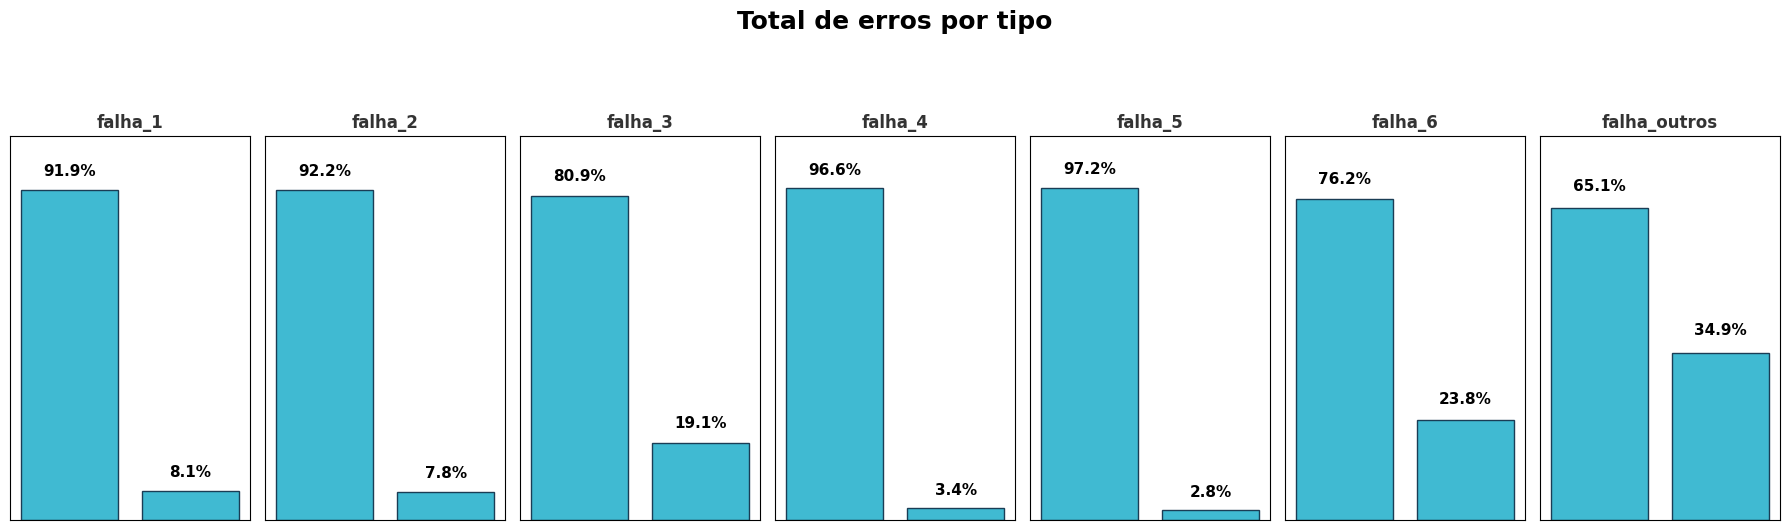

In [74]:
import matplotlib.pyplot as plt

# Calcular o total de registros contabilizados como 1 nas 7 últimas colunas
colunas_finais = df.iloc[:, -7:]
total_1s = (colunas_finais == 1).sum().sum()

# Criando o gráfico
plt.figure(figsize=(18, 5))

# Título geral com o total de registros igual a 1
plt.suptitle(f'Total de erros por tipo', fontsize=18, fontweight='bold', y=1.05)

# Iterar sobre as 7 últimas colunas
for i, col in enumerate(colunas_finais.columns, 1):
    plt.subplot(1, 7, i)
    
    contagem = df[col].value_counts()
    contagem_percentual = df[col].value_counts(normalize=True) * 100
    categorias = contagem_percentual.index.astype(str)
    valores_percentuais = contagem_percentual.values

    # Usar a cor #40BAD2 (azul claro) para o preenchimento das barras
    # Usar #1A3D55 para a borda das barras (azul muito mais escuro)
    bars = plt.bar(categorias, valores_percentuais, color='#40BAD2', edgecolor='#1A3D55')

    # Adicionar percentual acima das barras (sem a informação de registros)
    for bar, percentual in zip(bars, valores_percentuais):
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height()
        
        # Percentual (acima)
        plt.text(x, y + 3, f'{percentual:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

    # Título das subplots (coluna)
    plt.title(col, fontsize=12, fontweight='bold', color='#333333')
    
    # Remover a linha de grid vertical, deixar apenas o grid horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Ajuste de limites para garantir que os valores percentuais caibam bem
    plt.ylim(0, max(valores_percentuais) + 15)

    # Remover o eixo X e Y para um visual mais limpo
    plt.xticks([])
    plt.yticks([])

# Ajustar layout para não sobrepor os elementos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deixa espaço para o título
plt.show()


In [ ]:
colunas_erro= ['falha_1','falha_2','falha_3','falha_4','falha_5','falha_6', 'falha_outros']
df_filtrado = df[df[colunas_erro].any(axis=1)]
df_filtrado.shape

**Observa-se que o conjunto de dados encontra-se desbalanceado e que cada linha apresenta apenas um erro. Logo, estamos tratando de uma classificação do tipo multiclasse.**

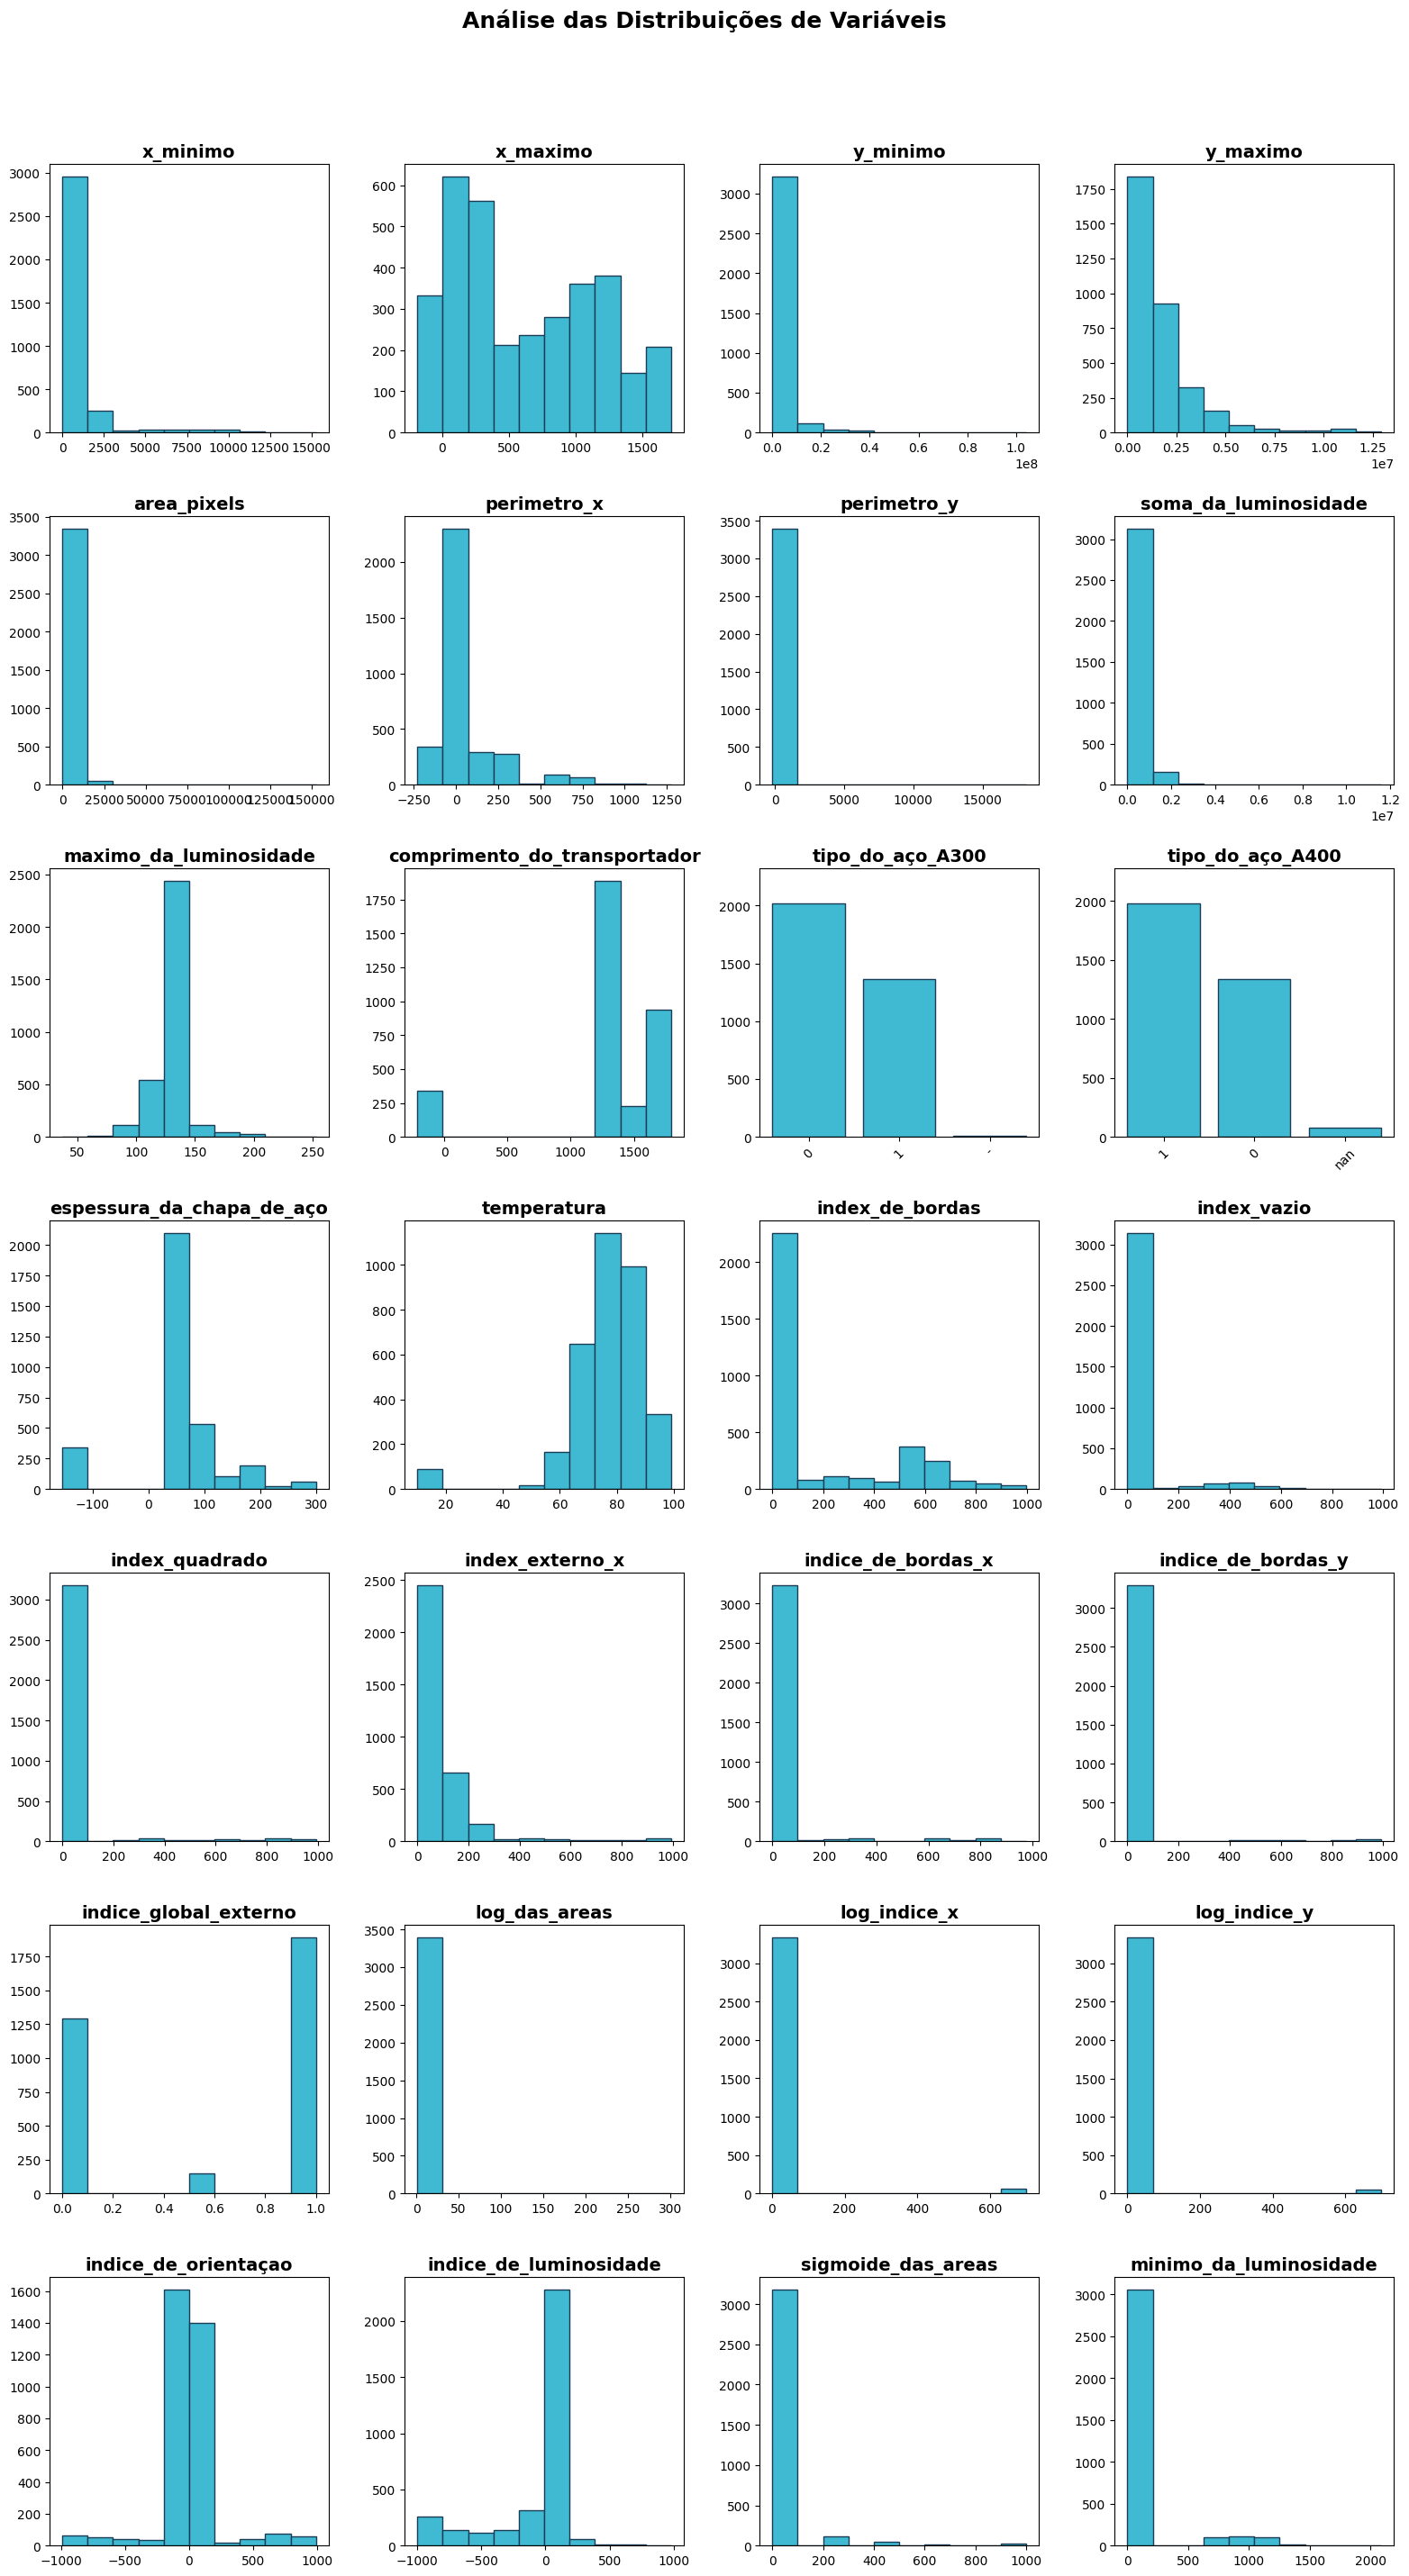

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo número de colunas (gráficos por linha)
n_colunas = 4
# Calcular o número de linhas baseado nas colunas restantes (sem as últimas 7)
n_linhas = (len(df.iloc[:, :-7].columns) + n_colunas - 1) // n_colunas  # Usando arredondamento para cima

# Criar uma figura com subgráficos
fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(16, 4 * n_linhas))

# Flatten para garantir que o axes seja uma lista unidimensional
axes = axes.flatten()

# Inserir título centralizado para a figura (com ajuste de espaçamento)
fig.suptitle(
    'Análise das Distribuições de Variáveis',  # Texto do título
    fontsize=18,                               # Tamanho da fonte
    fontweight='bold',                         # Estilo da fonte
    ha='center',                               # Alinhamento horizontal
    va='center',                               # Alinhamento vertical
    y=1.02                                     # Ajuste de posição (mais próximo dos gráficos)
)

# Loop pelos nomes das colunas e seus índices
for i, col in enumerate(df.iloc[:, :-7].columns):
    dtype = df[col].dtype
    
    # Se for gráfico de histograma
    if pd.api.types.is_numeric_dtype(dtype):  # int ou float
        axes[i].hist(df[col].dropna(), bins=10, color='#40BAD2', edgecolor='#1A3D55')  # Azul claro e borda escura
        axes[i].tick_params(axis='both', labelsize=10)  # Ajusta o tamanho dos rótulos dos eixos
        axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')  # Título da coluna
        
    else:  # Se for gráfico de barras para dados categóricos
        contagem = df[col].value_counts()
        percentuais = contagem / contagem.sum() * 100
        
        axes[i].bar(contagem.index.astype(str), contagem.values, color='#40BAD2', edgecolor='#1A3D55')  # Azul claro e borda escura
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)  # Rótulos no eixo X rotacionados
        axes[i].tick_params(axis='y', labelsize=10)  # Ajusta o tamanho dos rótulos do eixo Y
        axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')  # Título da coluna

        # Não adicionar percentuais acima das barras (removido o loop)
        # Ajustar o limite do eixo Y para aumentar o espaço entre as barras e o topo do gráfico
        axes[i].set_ylim(0, max(contagem.values) * 1.15)  # Aumenta o limite superior do eixo Y em 15%

# Esconder os subgráficos vazios
for j in range(len(df.iloc[:, :-7].columns), len(axes)):
    axes[j].axis('off')  # Desativa o eixo para os gráficos extras sem dados

# Ajustando o layout para evitar sobreposição de gráficos
plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre os subgráficos
plt.show()


A seguir, verificaremos em detalhes a presença de outliers no conjutno de dados

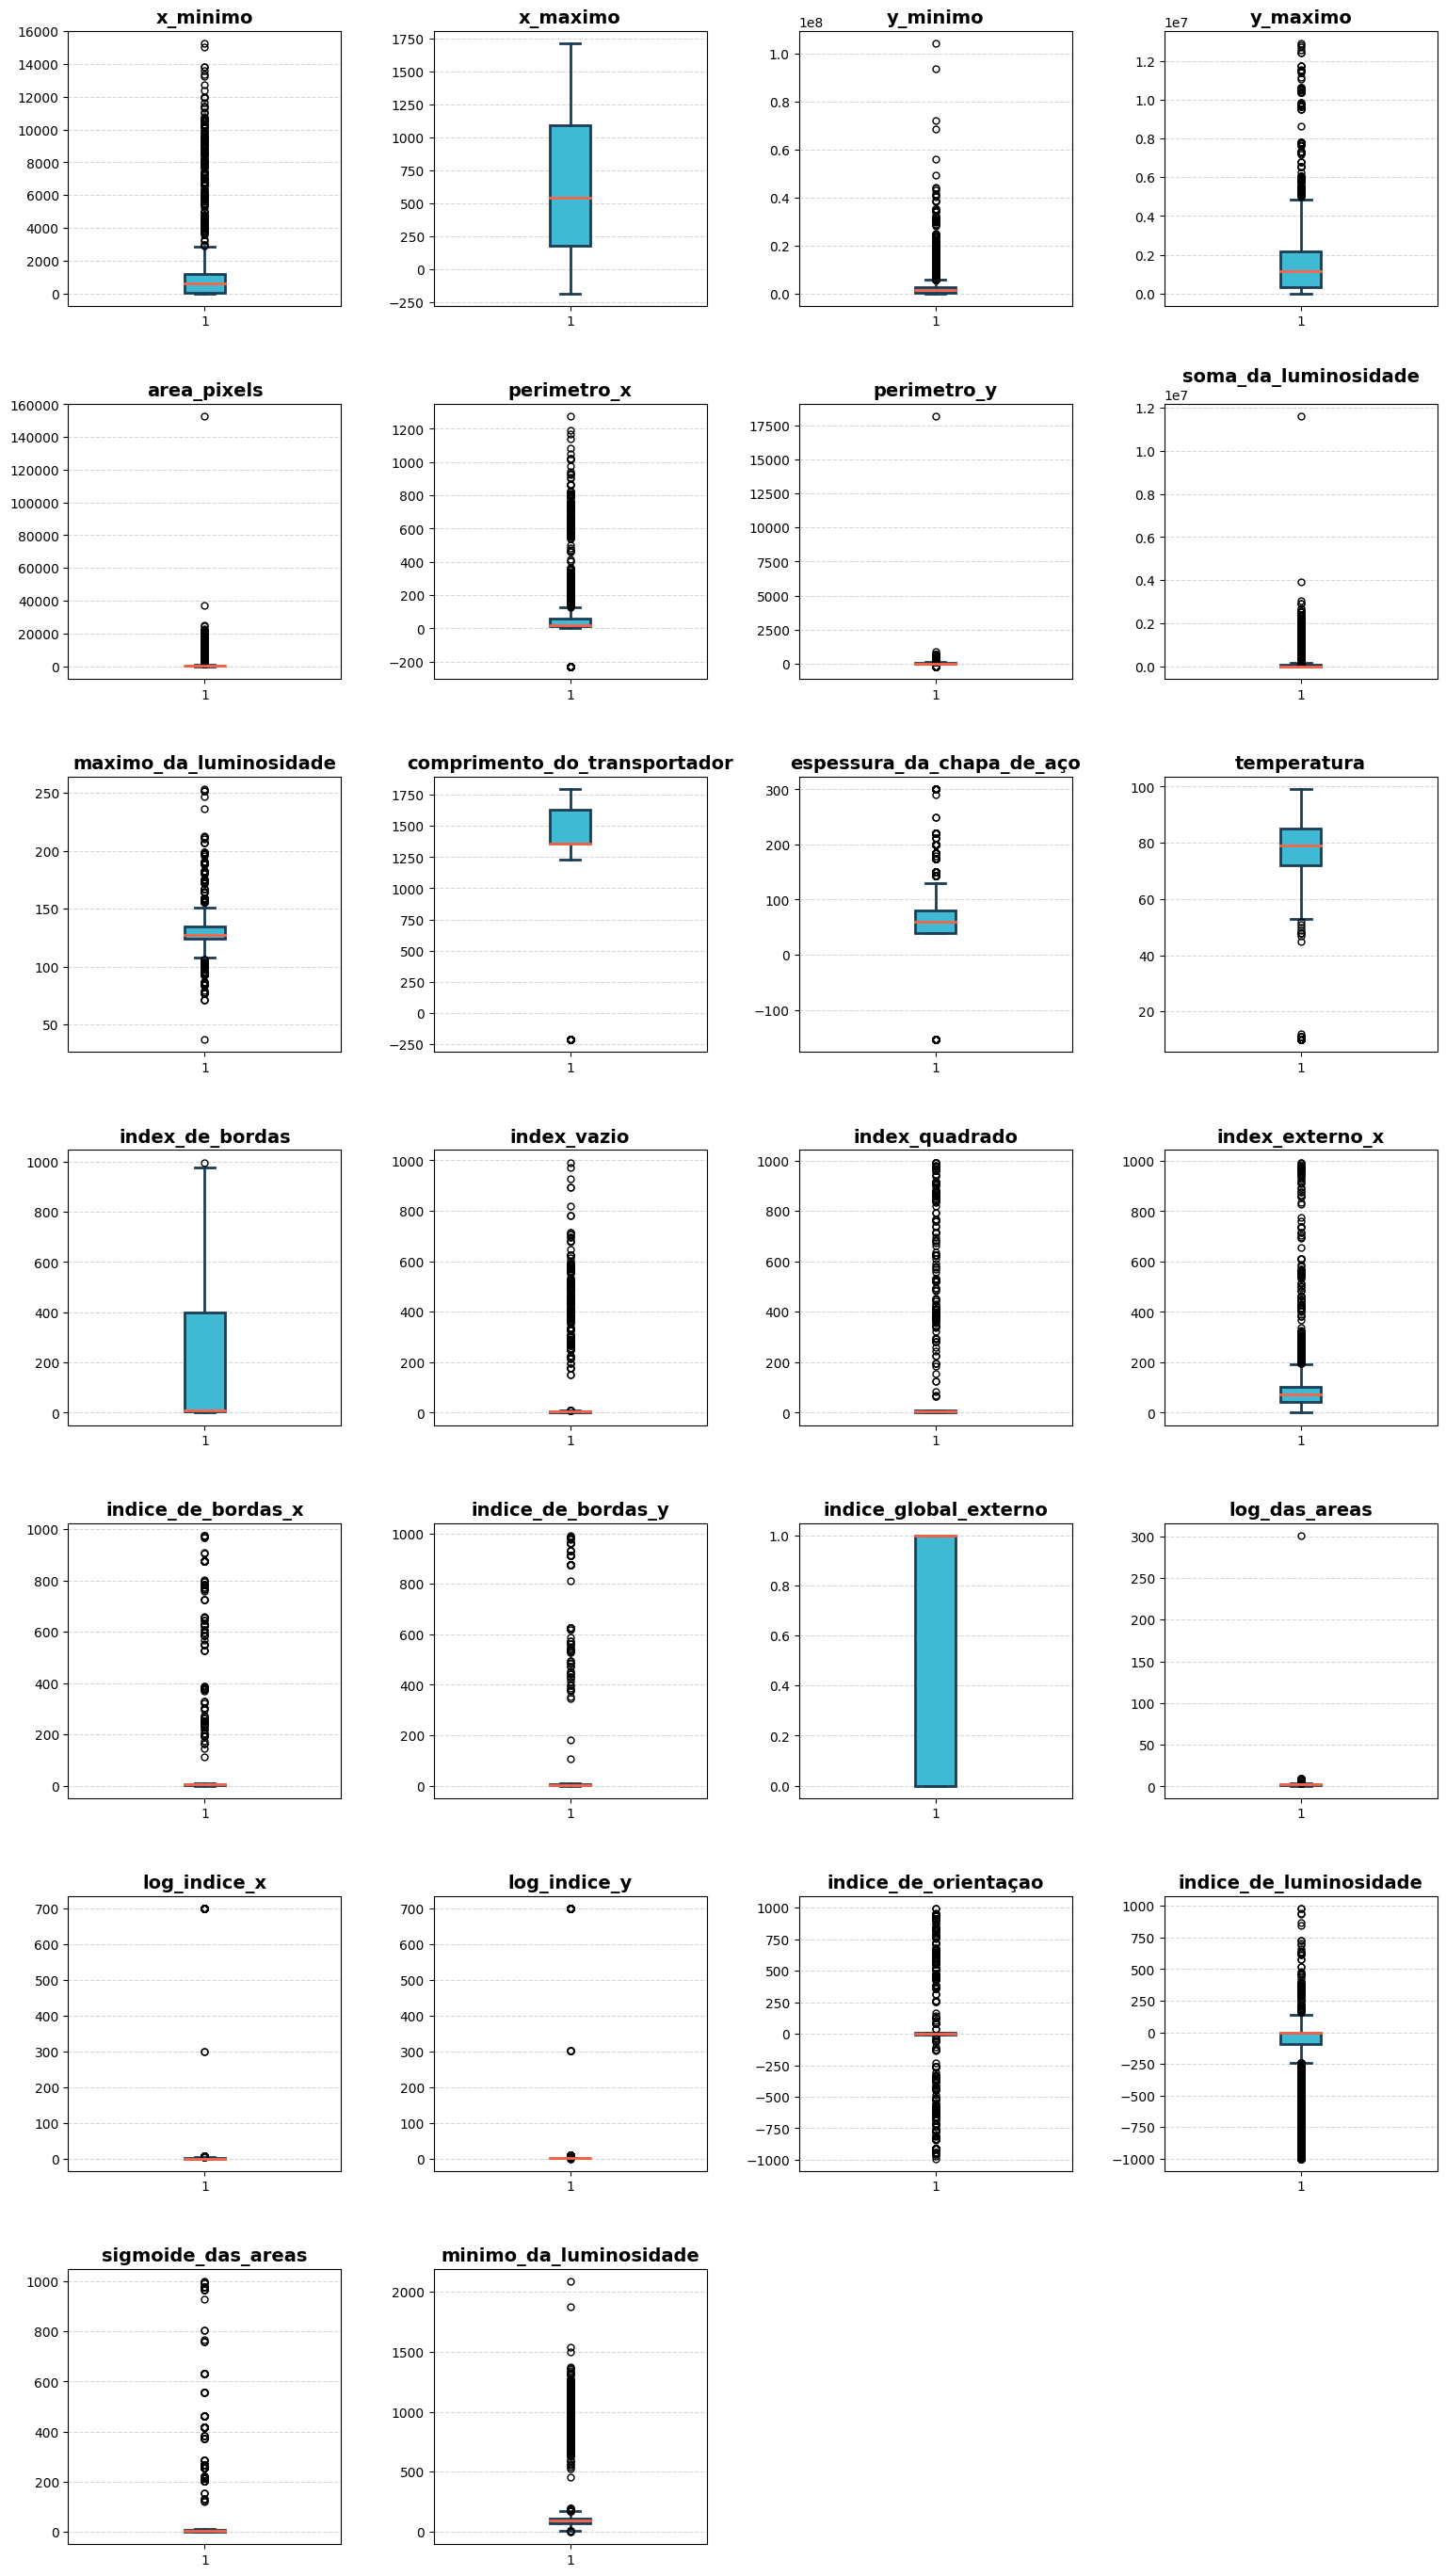

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtra colunas numéricas, exceto 'valor', e remove as últimas 7
colunas_numericas = df.select_dtypes(include='number').drop(columns='valor', errors='ignore')
colunas_numericas = colunas_numericas.iloc[:, :-7].columns  # Remove as últimas 7 colunas

# Configuração dos subplots
n_colunas = 4
n_linhas = len(colunas_numericas) // n_colunas + (len(colunas_numericas) % n_colunas > 0)

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(16, 4 * n_linhas))
axes = axes.flatten()

# Criação dos boxplots
for i, col in enumerate(colunas_numericas):
    axes[i].boxplot(
        df[col].dropna(),
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor='#40BAD2', color='#1A3D55', linewidth=2),
        whiskerprops=dict(color='#1A3D55', linewidth=2),
        capprops=dict(color='#1A3D55', linewidth=2),
        flierprops=dict(marker='o', color='#FF6347', markersize=5),
        medianprops=dict(color='#FF6347', linewidth=2)
    )
    
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)

# Remove eixos extras (caso o número de colunas não seja múltiplo de 4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuste do layout
plt.tight_layout(pad=3.0)
plt.show()


Importante: as colunas com dados negativos apresentam sempre os mesmos valores e em quantidade sempre de 339
Agora, vamos estudar como os valores considerados atipicos se comportam em relação às falhas

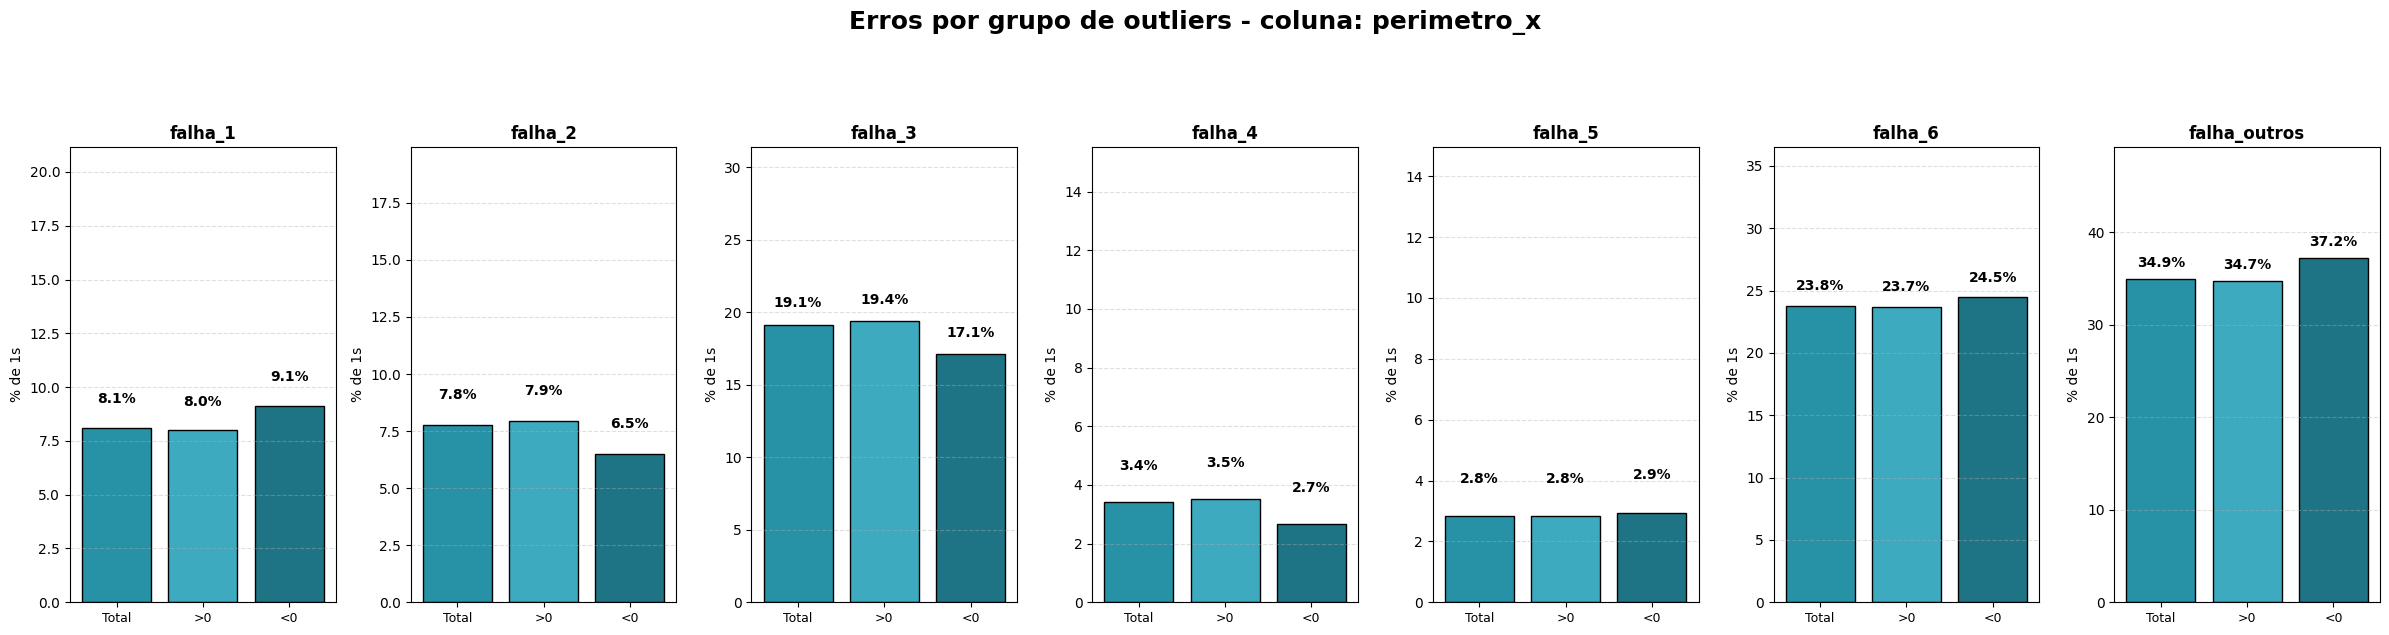

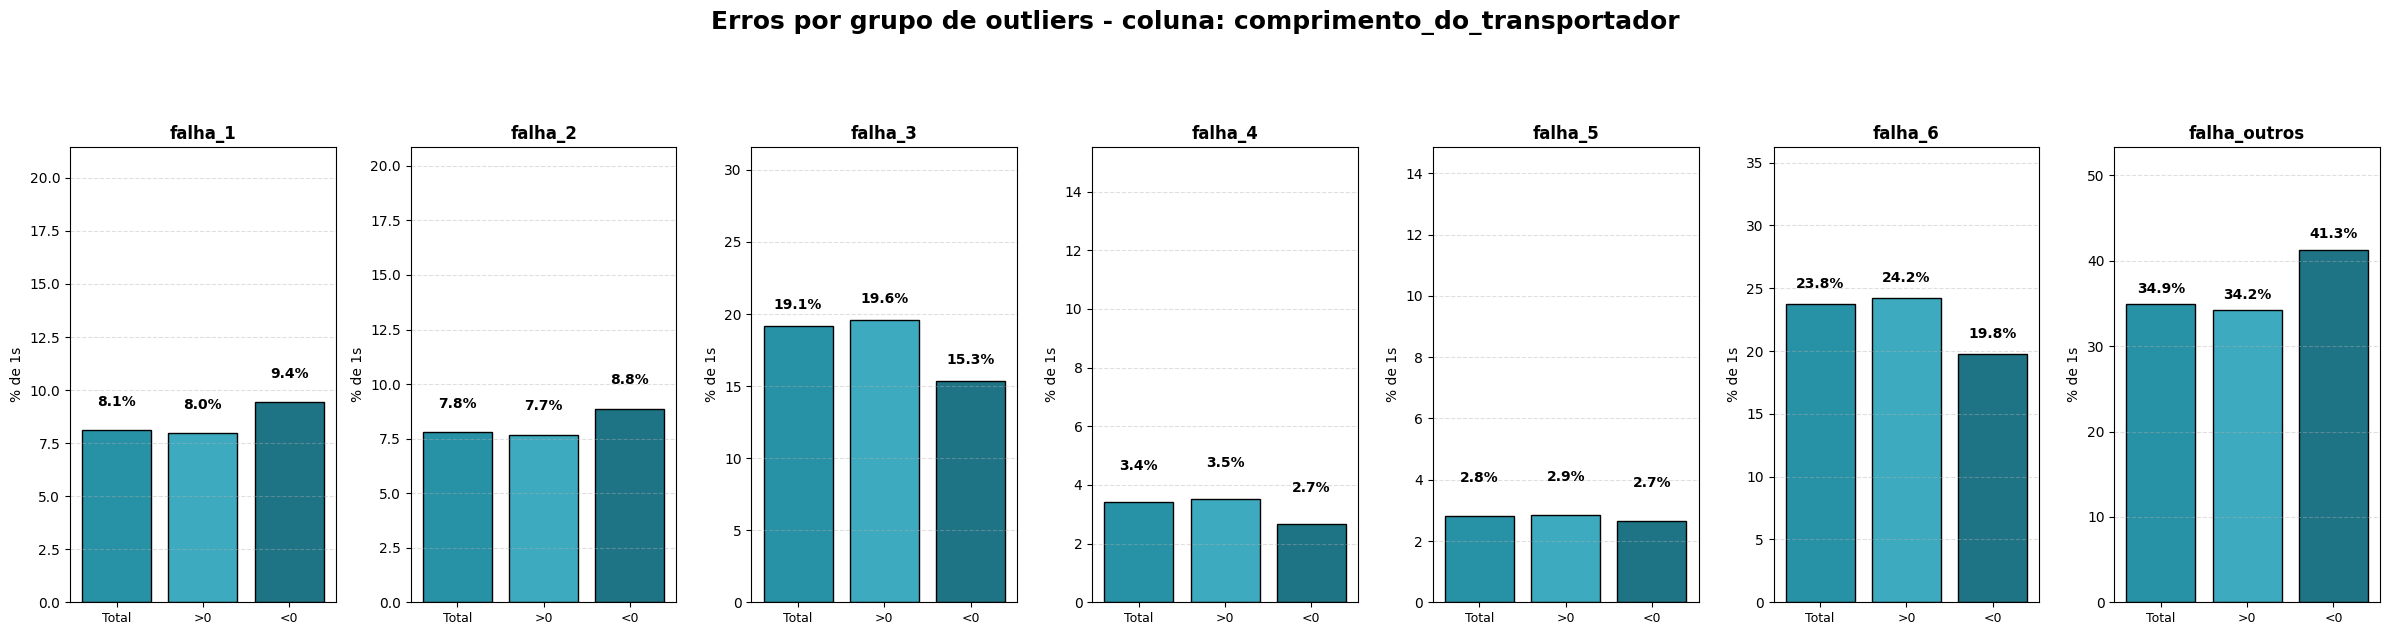

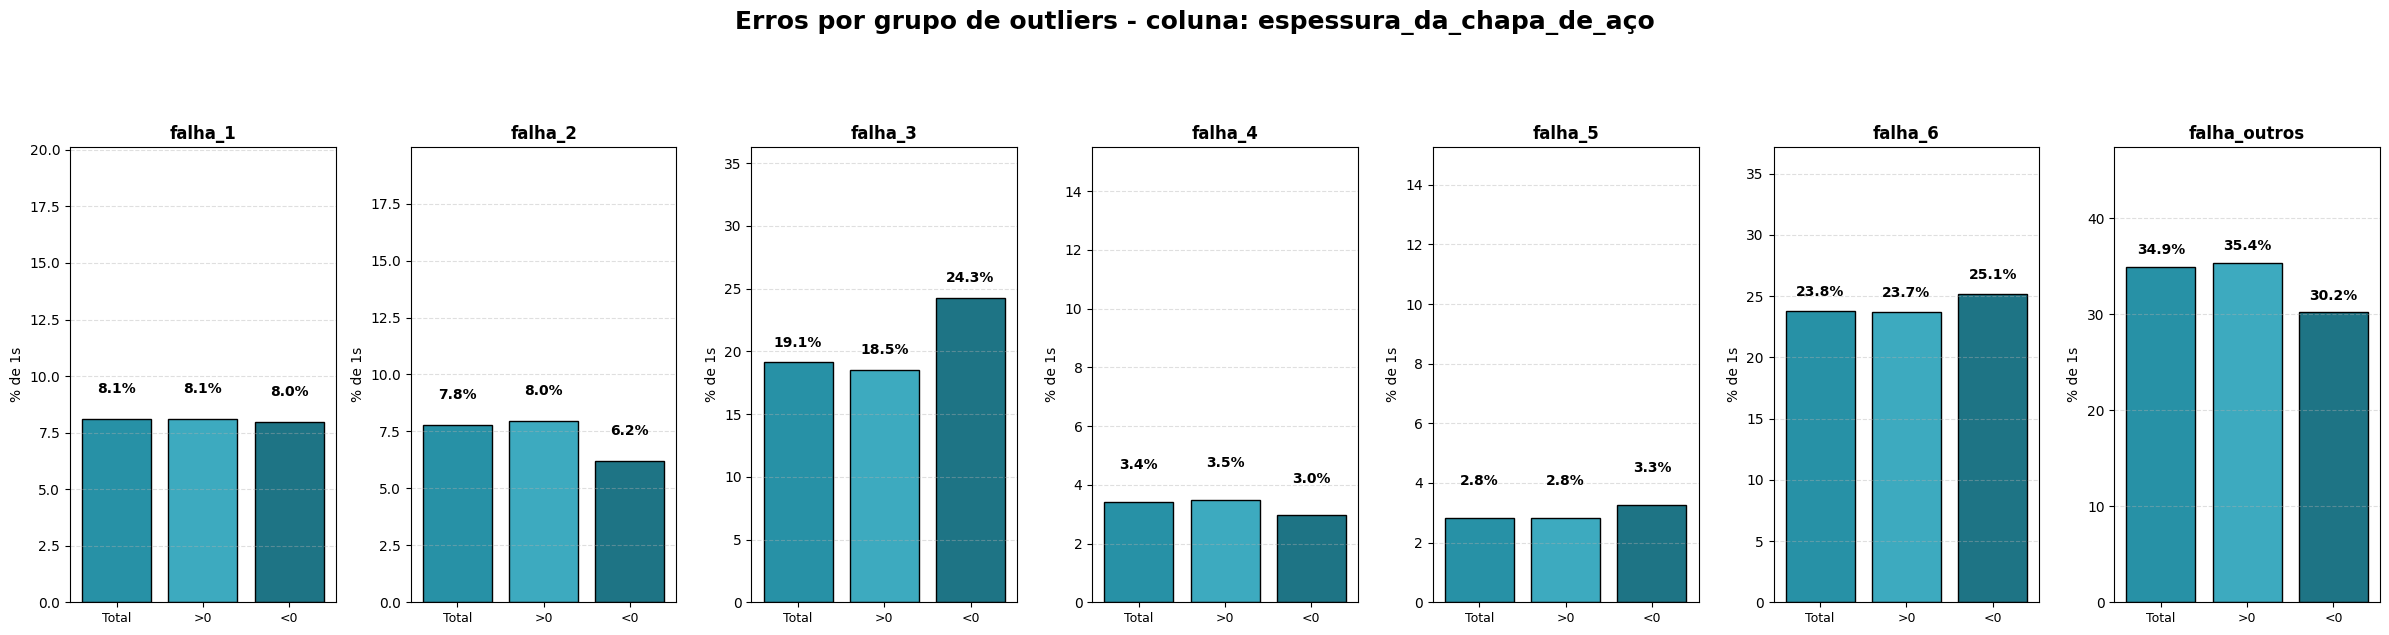

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_barras_comparativas(df, variavel):
    # Paleta azul inspirada no Storytelling com Dados
    cores = ['#2791A6', '#3DAABF', '#1E7485'] # tons de azul suave a médio
    
    # Selecionar as 7 últimas colunas (assumindo que são as colunas de falhas)
    colunas_finais = df.columns[-7:]
    
    # Definir os grupos
    grupos = {
        'Total': df,
        '>0': df[df[variavel] > 0],
        '<0': df[df[variavel] < 0]
    }

    plt.figure(figsize=(24, 6))
    plt.suptitle(f'Erros por grupo de outliers - coluna: {variavel}', 
                 fontsize=18, fontweight='bold', y=1.05)

    for i, col in enumerate(colunas_finais, 1):
        plt.subplot(1, 7, i)

        percentuais = []

        for grupo_df in grupos.values():
            total = (grupo_df[col] == 1).sum()
            percentual = 100 * total / len(grupo_df) if len(grupo_df) > 0 else 0
            percentuais.append(percentual)

        bars = plt.bar(grupos.keys(), percentuais, color=cores, edgecolor='black')

        # Mostrar só o percentual em cima da barra
        for bar, perc in zip(bars, percentuais):
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height()
            plt.text(x, y + 1, f'{perc:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.title(col, fontsize=12, fontweight='bold')
        plt.ylim(0, max(percentuais) + 12)
        plt.ylabel('% de 1s')
        plt.xticks(fontsize=9)
        plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Exemplo de chamada:
# plot_barras_comparativas(df, 'perimetro_x')

    
# Chamada para testar com diferentes variáveis:
# 1. Para "perimetro_x"
plot_barras_comparativas(df, 'perimetro_x')

# 2. Para "comprimento_do_transportador"
plot_barras_comparativas(df, 'comprimento_do_transportador')

# 3. Para "espessura_da_barra_de_aco"
plot_barras_comparativas(df, 'espessura_da_chapa_de_aço')


**Observa-se que apesar de os dados haverem apresentado valores inconsistentes, como negativos, a quantidade de erro por grupo mantem-se frequente. Assim sendo, evitaremos, para momento, modificar os dados apresentados.**

Devido ao à similaridade nos registros acima e ao fato de manterem quase a mesma taxa de erro, decidimos verificar se tratavam-se dos mesmos registros. Como pode ser observado abaixo, esse não foi o caso.

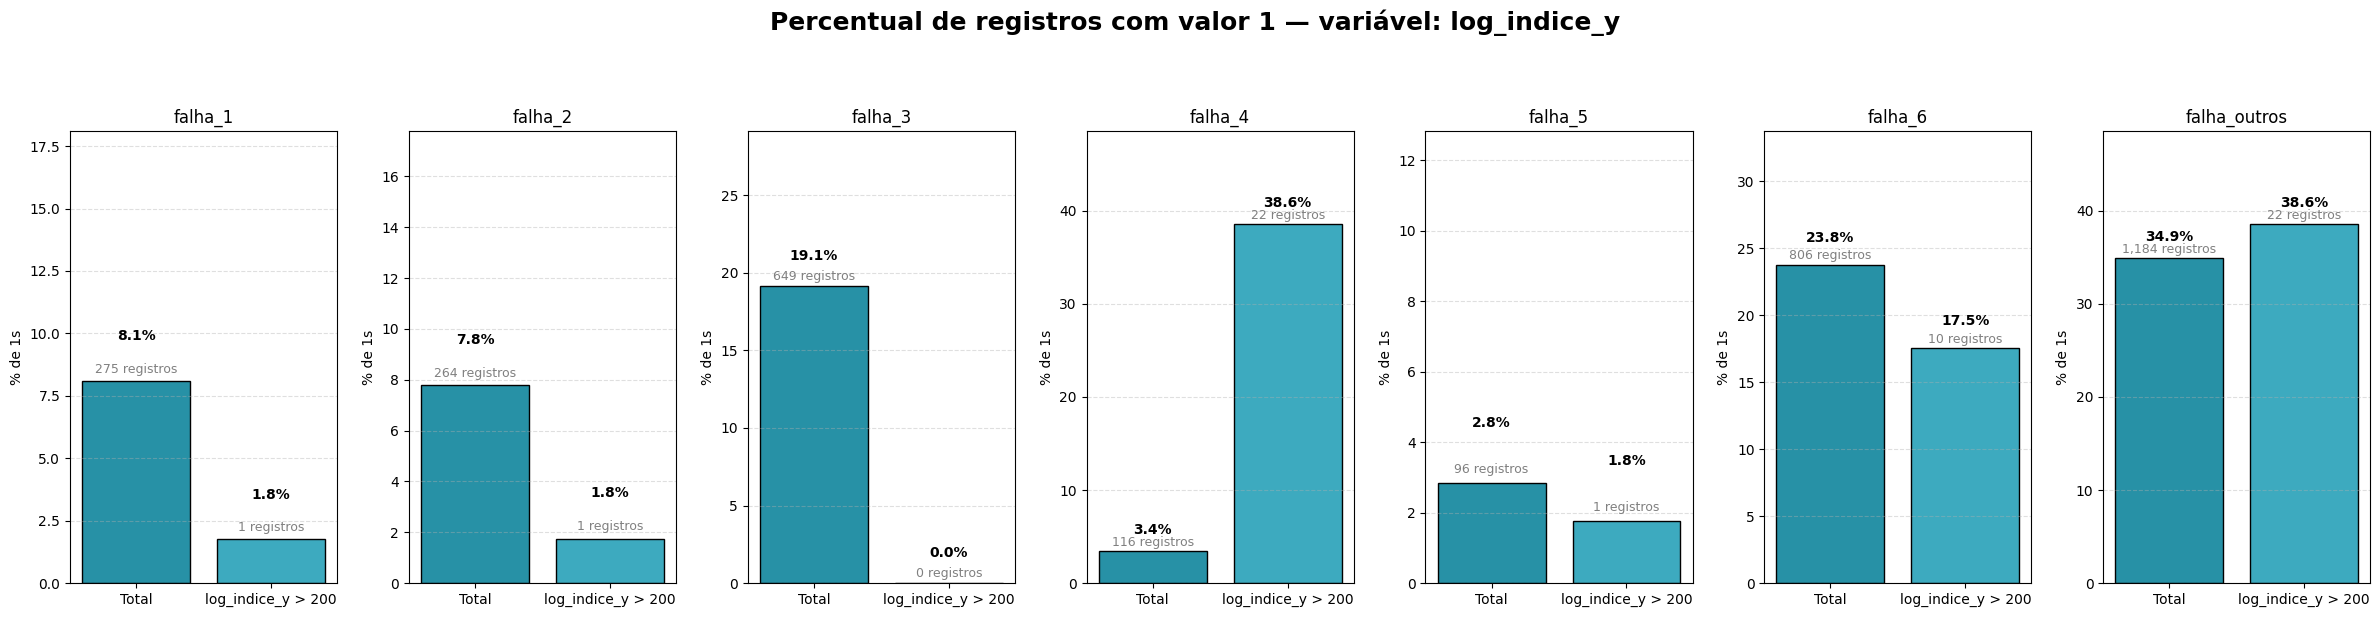

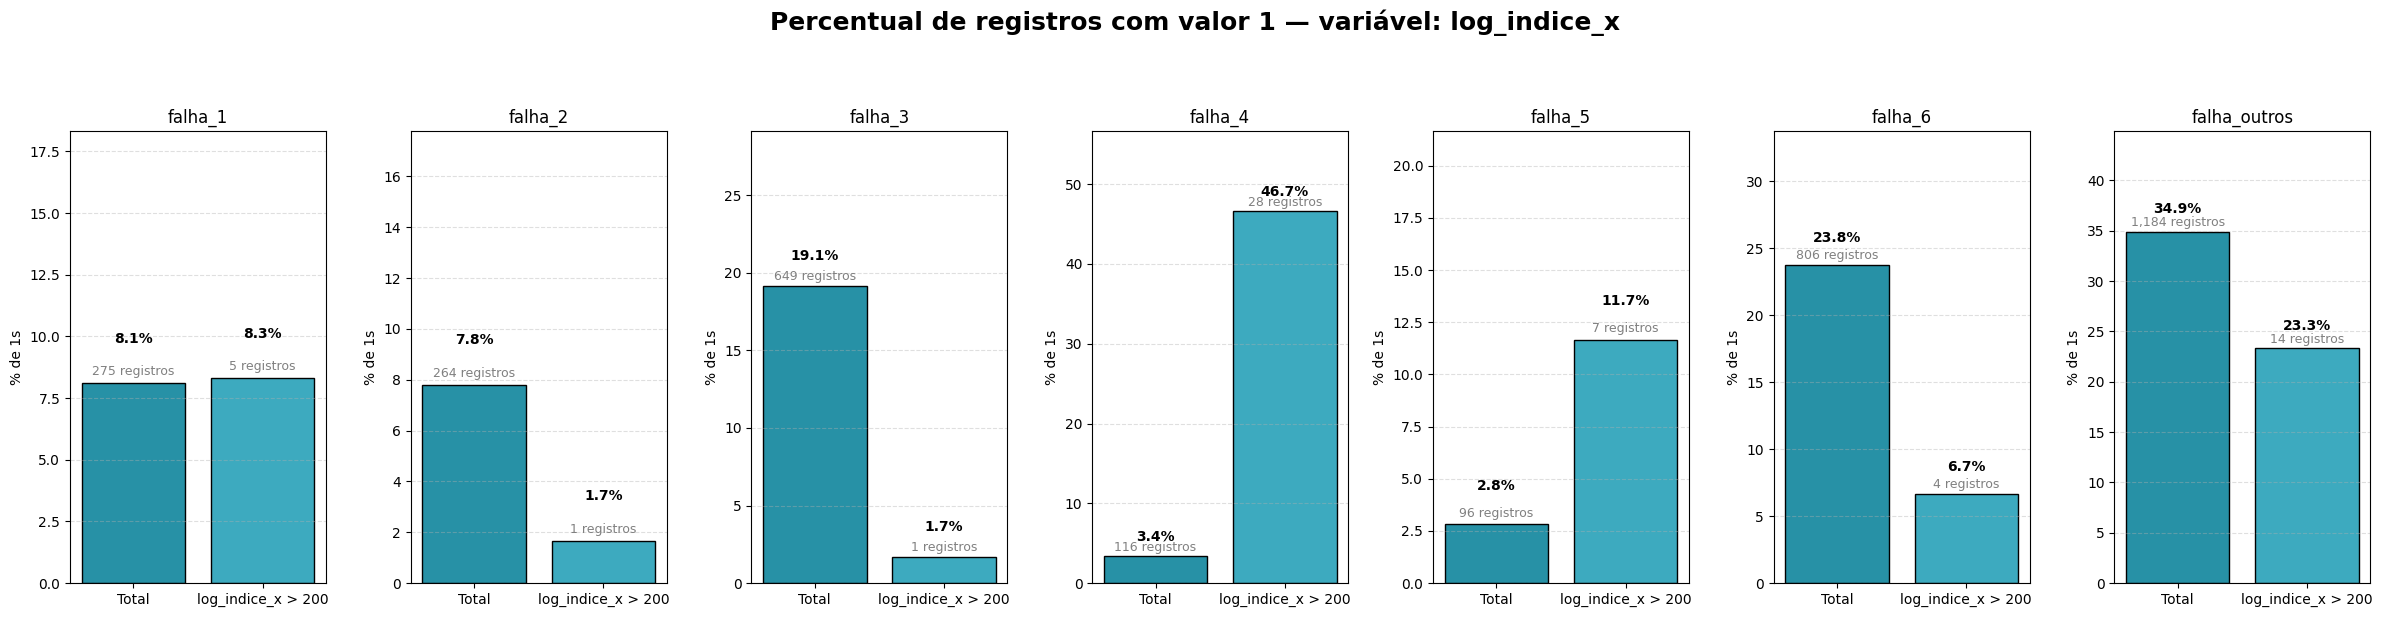

In [83]:
import matplotlib.pyplot as plt

# Garante que os gráficos apareçam no Jupyter
%matplotlib inline

def plot_barras_comparativas(df, variavel, cores=('#2791A6', '#3DAABF')):
    
    # Selecionar as 7 últimas colunas (assumindo que são as colunas que representam as falhas)
    colunas_finais = df.columns[-7:]
    
    # Definir os grupos: total e valores maiores que 200
    grupos = {
        'Total': df,
        f'{variavel} > 200': df[df[variavel] > 200]
    }

    # Configurar o tamanho da figura para todos os gráficos ficarem em uma linha
    plt.figure(figsize=(24, 6))  # Tamanho da figura ajustado para 7 gráficos lado a lado
    plt.suptitle(f'Percentual de registros com valor 1 — variável: {variavel}', fontsize=18, fontweight='bold', y=1.02)

    for i, col in enumerate(colunas_finais, 1):
        plt.subplot(1, 7, i)  # Colocar todos os 7 gráficos em uma linha (1 linha e 7 colunas)
        
        percentuais = []
        absolutos = []

        # Iterar sobre os grupos (total, >200)
        for grupo_nome, grupo_df in grupos.items():
            total = (grupo_df[col] == 1).sum()  # Contar o número de 1s na coluna
            percentual = 100 * total / len(grupo_df) if len(grupo_df) > 0 else 0  # Percentual
            percentuais.append(percentual)
            absolutos.append(total)

        # Criar as barras
        bars = plt.bar(grupos.keys(), percentuais, color=cores, edgecolor='black')

        # Adicionar texto nas barras (percentual e valor absoluto)
        for bar, perc, abs_val in zip(bars, percentuais, absolutos):
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height()
            plt.text(x, y + 1.5, f'{perc:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
            plt.text(x, y + 0.2, f'{abs_val:,} registros', ha='center', va='bottom', fontsize=9, color='gray')

        # Títulos e ajustes do gráfico
        plt.title(col, fontsize=12)
        plt.ylim(0, max(percentuais) + 10)
        plt.ylabel('% de 1s')
        plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta o layout
    plt.show()

# Exemplo de chamada
plot_barras_comparativas(df, 'log_indice_y')
plot_barras_comparativas(df, 'log_indice_x')

Aqui observamos dados importantes, os dados caracterizados como outlier apresentam significativa diferença em relação à classe original. Vale considerar o gerenciamento desses dados para um valor de média. No entanto, primeiro vamos testar esse dados no modelo.

Após as análises, continuatremos com a substituição de outliers e valores nulos como seque.

**SUBSTITUIÇÃO DE OUTLIERS:**

* y_minimo: faremos a média, sem considerar os outliers, devido a dispersão de dados e de apresentar erro em classes significativamente desbalanceadas
* area_pixels: faremos a média, sem considerar o outier porque é o único valor que apresentou descrepância
* perímetro_x: apesar de apresentar valores negativos, a coluna não apresentou diferença significativa na distribuição dos erros. Aparentemente tais valores tratam-se apenas de falha de registro. Por conta da consistência presente na identificaçao dos erros, não serão realizadas alterações no dado.
* perímetro_y: faremos a média, sem considerar os outliers, devido a dispersão de dados e de apresentar erro em classes significativamente desbalanceadas
* soma_da_luminosidade:faremos a média, sem considerar os outliers, devido a dispersão de dados e de apresentar erro em classes significativamente desbalanceadas
* máximo_da_luminosidade: faremos a média porque há grande quantidade de outliers, no entanto, sem grande dispersão entre os mesmos.
* comprimento_do_transportador: apesar de apresentar valores negativos, a coluna não apresentou diferença significativa na distribuição dos erros. Aparentemente tais valores tratam-se apenas de falha de registro. Por conta da consistência presente na identificaçao dos erros, não serão realizadas alterações no dado.
* Espessura_da_chapa_de_aço: apesar de apresentar valores negativos, a coluna não apresentou diferença significativa na distribuição dos erros. Aparentemente tais valores tratam-se apenas de falha de registro. Por conta da consistência presente na identificaçao dos erros, não serão realizadas alterações no dado.
* Index de bordas: calcular média sem considerar outlier porque é o único valor discrepante
* Log das áreas:calcular média sem considerar outlier porque é o único valor discrepante
* Mínimo de luminosidade: faremos a média sem considerar os outliers porque são poucos valores discrepantes




In [86]:
criterios = {
    'y_minimo': lambda x: x > 60000000,
    'area_pixels': lambda x: x >60000,
    'perimetro_x': lambda x: x < 0,
    'perimetro_y': lambda x: x >15000,
    'soma_da_luminosidade': lambda x: x > 10000000,
    'maximo_da_luminosidade': lambda x: x >230,
    'maximo_da_luminosidade': lambda x: x <50,
    'comprimento_do_transportador': lambda x: x<0,
    'espessura_da_chapa_de_aço': lambda x: x< 0,
    'index_de_bordas': lambda x: x>980,
    'log_das_areas': lambda x: x>250,
    'log_indice_x': lambda x: x>200,
    'log_indice_y': lambda x: x>200,
    'minimo_da_luminosidade': lambda x: x>1800
}

In [ ]:
#filtrados = df[df['y_minimo'] > 60000000]
#filtrados = df[df['area_pixels'] > 60000]
#filtrados = df[df['perimetro_y'] > 15000]
#filtrados = df[df['soma_da_luminosidade'] > 10000000]
#filtrados = df[(df['maximo_da_luminosidade'] < 50) | (df['maximo_da_luminosidade'] > 230)]
#filtrados = df[df['index_de_bordas'] > 980]
#filtrados = df[df['log_das_areas'] <250]
#filtrados = df[df['minimo_da_luminosidade'] > 980]
#print(filtrados.shape)

In [ ]:
#coluna y_minimo
media = df[df['y_minimo'] < 60000000]['y_minimo'].mean()
df.loc[df['y_minimo'] > 60000000, 'y_minimo'] = media


#coluna area_pixels
media = df[df['area_pixels'] < 60000]['area_pixels'].mean()
df.loc[df['area_pixels'] > 60000, 'area_pixels'] = media

#perimetro_y
media = df[df['perimetro_y'] < 15000]['perimetro_y'].mean()
df.loc[df['perimetro_y'] > 15000, 'perimetro_y'] = media

#soma da luminosidade
media = df[df['soma_da_luminosidade'] < 10000000]['perimetro_y'].mean()
df.loc[df['soma_da_luminosidade'] > 10000000, 'soma_da_luminosidade'] = media


#maximo da luminosidade
media = df['maximo_da_luminosidade'].mean()
df.loc[df['maximo_da_luminosidade'] < 50, 'maximo_da_luminosidade'] = media
df.loc[df['maximo_da_luminosidade'] > 230, 'maximo_da_luminosidade'] = media

#index de borda
media = df[df['index_de_bordas'] < 980]['index_de_bordas'].mean()
df.loc[df['index_de_bordas'] > 980, 'index_de_bordas'] = media

#log das áreas
media = df[df['log_das_areas'] < 250]['log_das_areas'].mean()
df.loc[df['log_das_areas'] >250, 'log_das_areas'] = media

#minimo da luminosidade
media = df[df['minimo_da_luminosidade'] < 1800]['minimo_da_luminosidade'].mean()
df.loc[df['minimo_da_luminosidade'] >1800, 'minimo_da_luminosidade'] = media

SUBSTITUIÇÃO DE VALORES NULOS

In [ ]:
Atributos que apresentam valor nulo:

* soma_da_luminosidade
* maximo_da_luminosidade
* espessura_da_chapa_de_aço
* index_quadrado
* indice_global_externo
* indice_de_luminosidade 

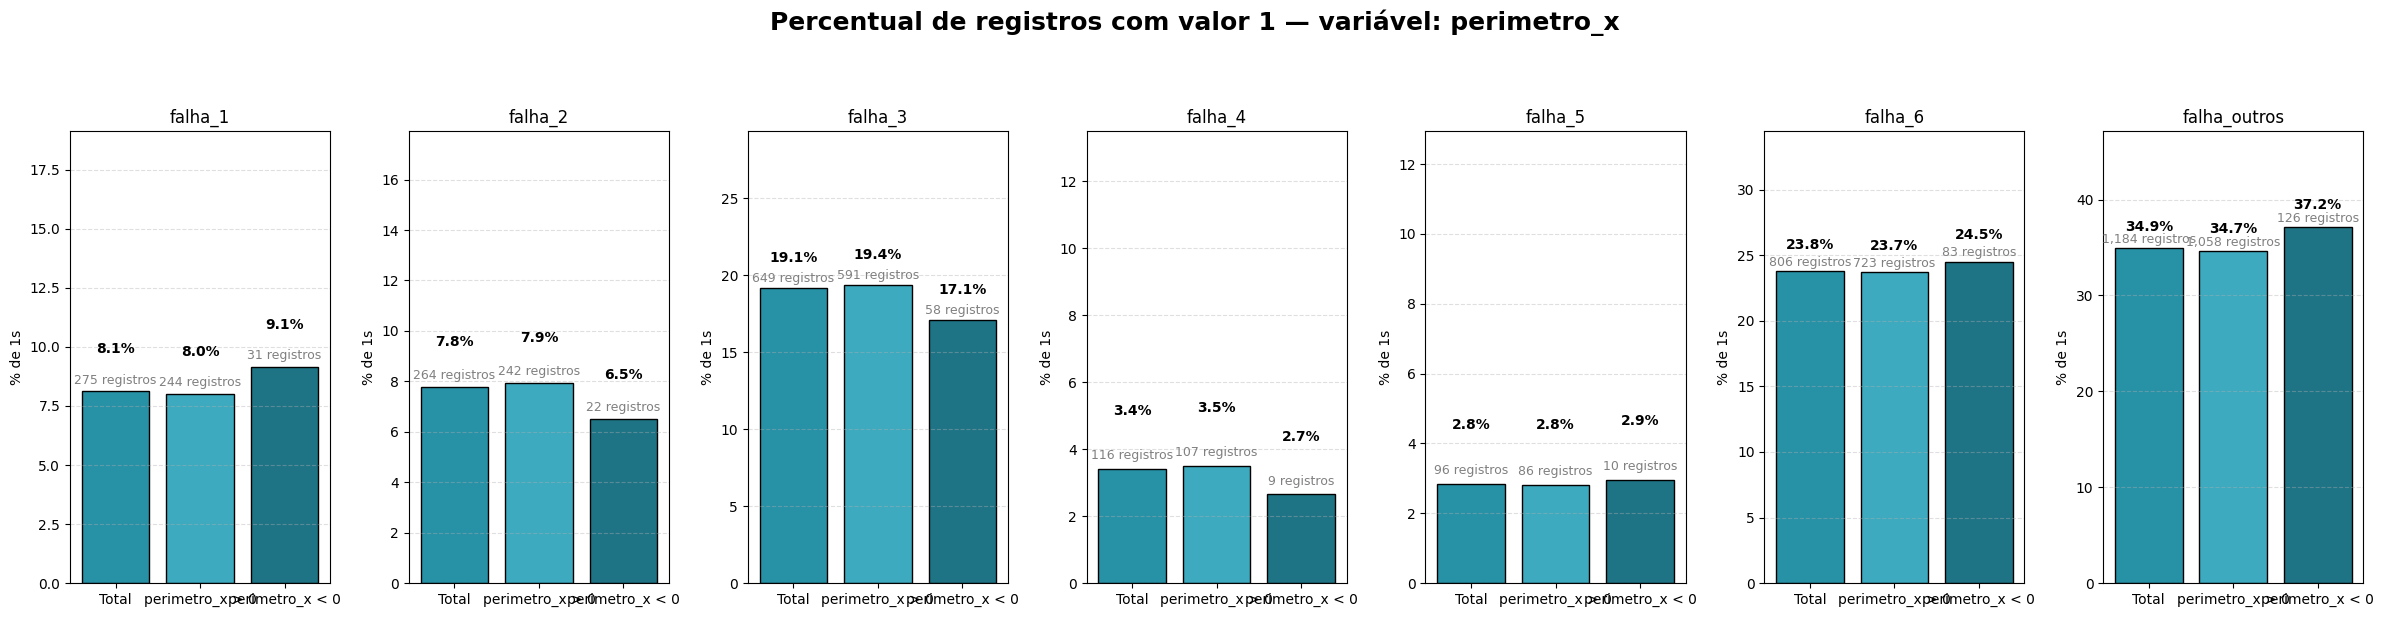

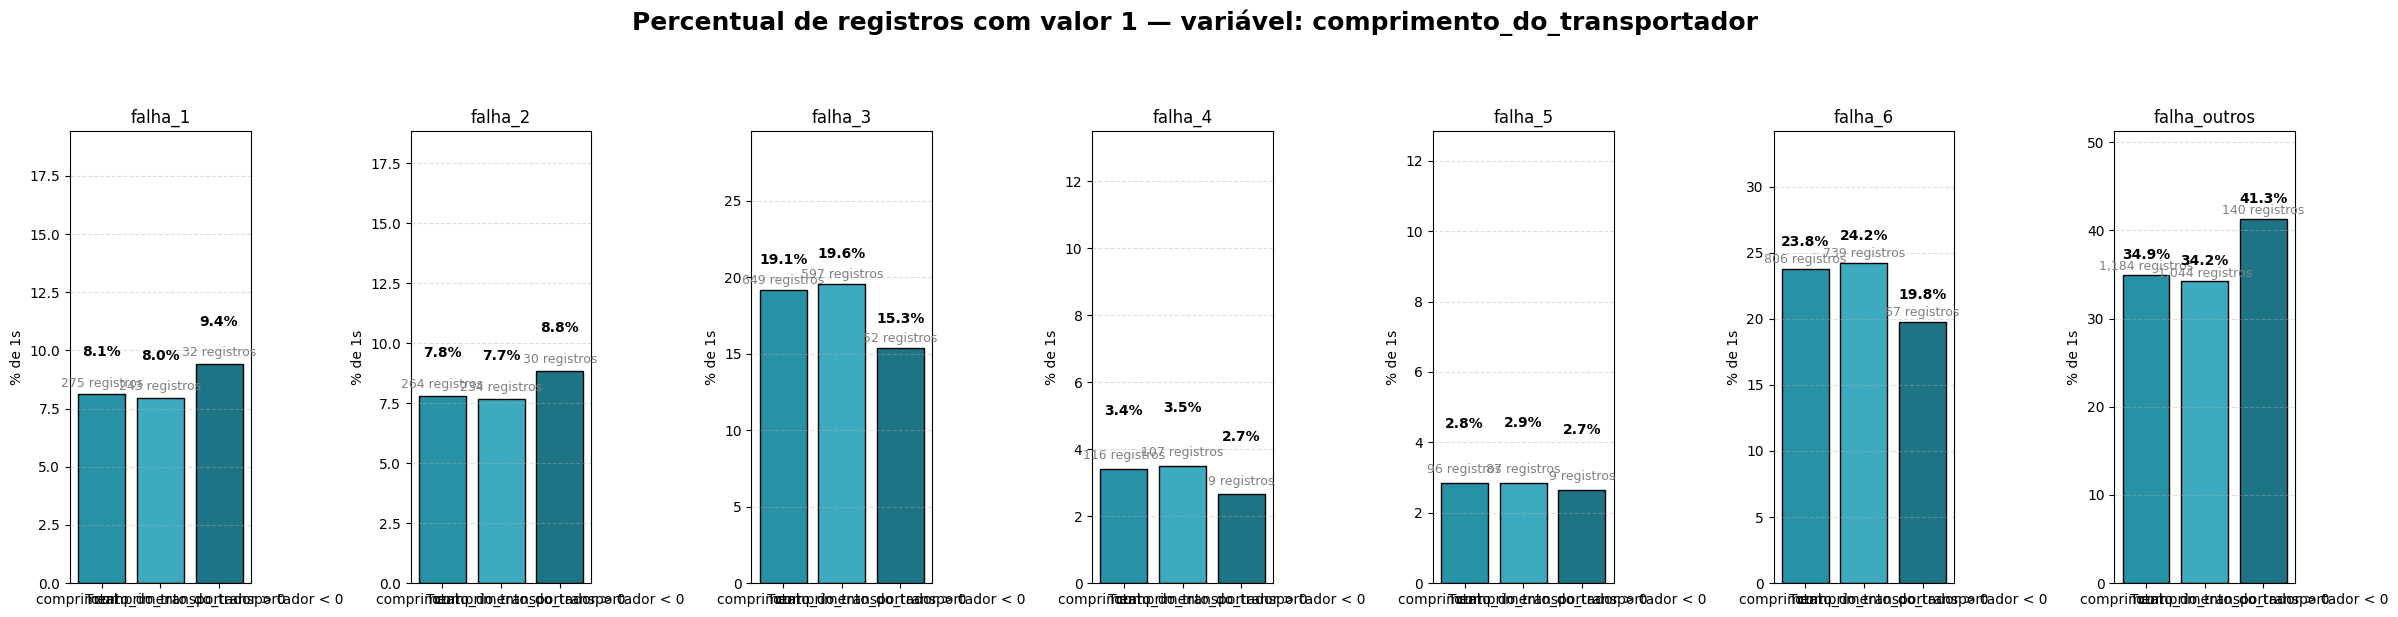

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


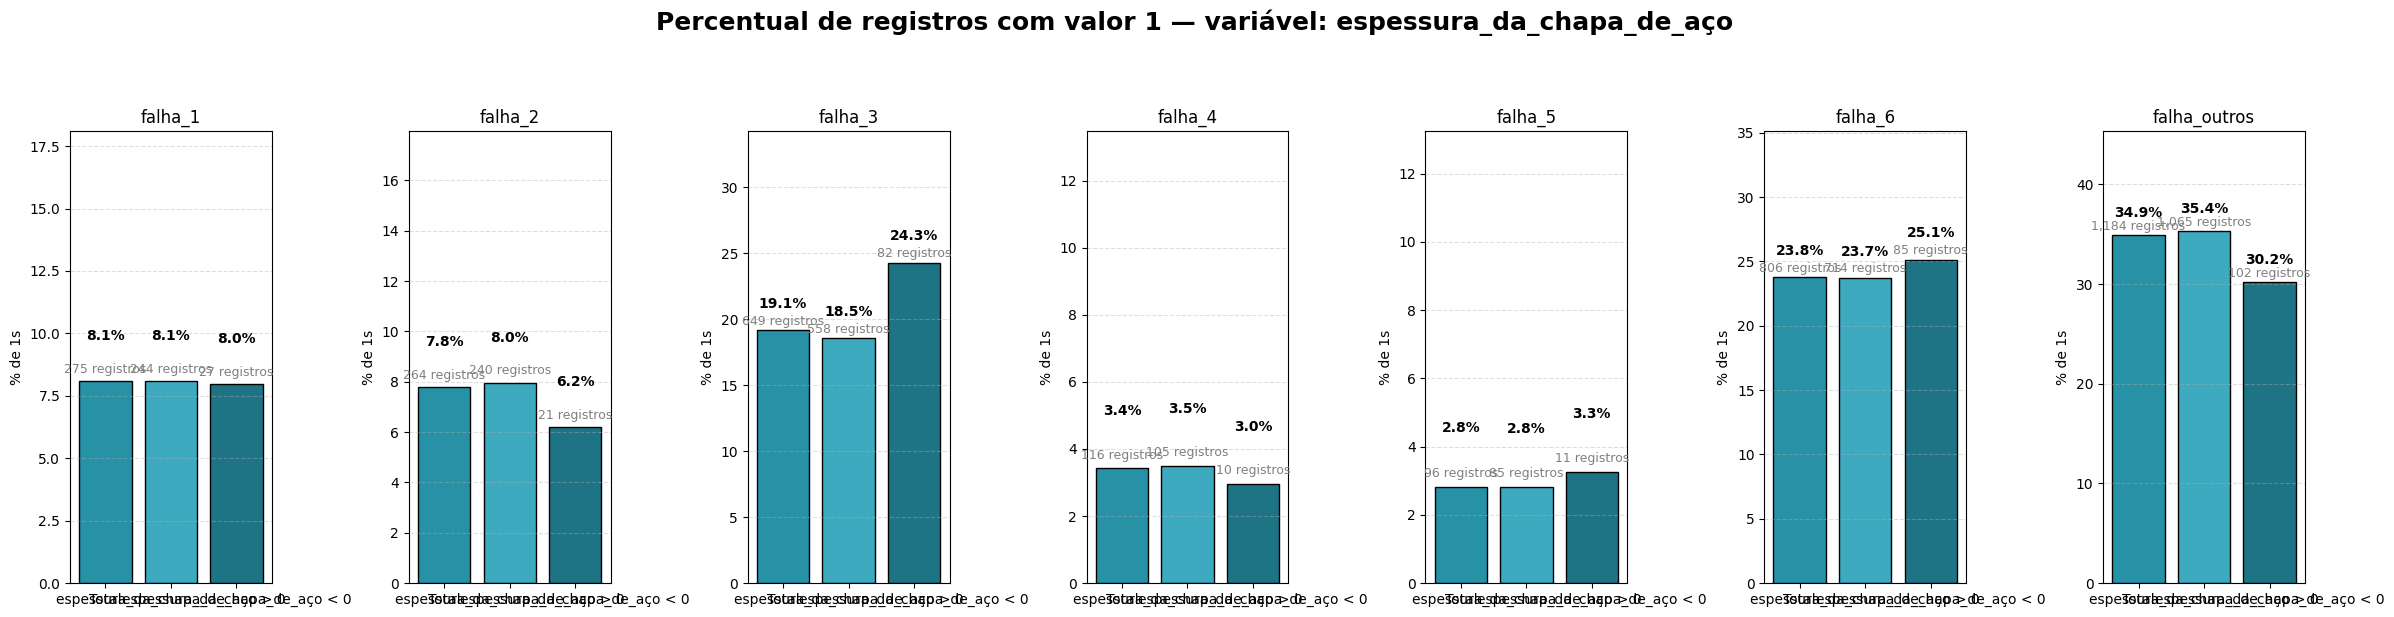

In [101]:
import matplotlib.pyplot as plt

# Garante que os gráficos apareçam no Jupyter
%matplotlib inline

def plot_barras_comparativas(df, variavel, cores=('#2791A6', '#3DAABF', '#1E7485')):
    # Selecionar as 7 últimas colunas (assumindo que são as colunas que representam as falhas)
    colunas_finais = df.columns[-7:]
    
    # Definir os grupos: total, valores positivos e negativos
    grupos = {
        'Total': df,
        f'{variavel} > 0': df[df[variavel] > 0],
        f'{variavel} < 0': df[df[variavel] < 0]
    }

    # Configurar o tamanho da figura para todos os gráficos ficarem em uma linha
    plt.figure(figsize=(24, 6))  # Tamanho da figura ajustado para 7 gráficos lado a lado
    plt.suptitle(f'Percentual de registros com valor 1 — variável: {variavel}', fontsize=18, fontweight='bold', y=1.02)

    for i, col in enumerate(colunas_finais, 1):
        plt.subplot(1, 7, i)  # Colocar todos os 7 gráficos em uma linha (1 linha e 7 colunas)
        
        percentuais = []
        absolutos = []

        # Iterar sobre os grupos (total, maior que zero, menor que zero)
        for grupo_nome, grupo_df in grupos.items():
            total = (grupo_df[col] == 1).sum()  # Contar o número de 1s na coluna
            percentual = 100 * total / len(grupo_df) if len(grupo_df) > 0 else 0  # Percentual
            percentuais.append(percentual)
            absolutos.append(total)

        # Criar as barras
        bars = plt.bar(grupos.keys(), percentuais, color=cores, edgecolor='black')

        # Adicionar texto nas barras (percentual e valor absoluto)
        for bar, perc, abs_val in zip(bars, percentuais, absolutos):
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height()
            plt.text(x, y + 1.5, f'{perc:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
            plt.text(x, y + 0.2, f'{abs_val:,} registros', ha='center', va='bottom', fontsize=9, color='gray')

        # Títulos e ajustes do gráfico
        plt.title(col, fontsize=12)
        plt.ylim(0, max(percentuais) + 10)
        plt.ylabel('% de 1s')
        plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta o layout
    plt.show()

# Chamada para testar com diferentes variáveis:
# 1. Para "perimetro_x"
plot_barras_comparativas(df, 'perimetro_x')

# 2. Para "comprimento_do_transportador"
plot_barras_comparativas(df, 'comprimento_do_transportador')

# 3. Para "espessura_da_barra_de_aco"
plot_barras_comparativas(df, 'espessura_da_chapa_de_aço')


In [102]:
media = df['soma_da_luminosidade'].mean()
df['soma_da_luminosidade'].fillna(media, inplace=True)
media = df['indice_global_externo'].mean()
df['indice_global_externo'].fillna(media, inplace=True)
media = df['maximo_da_luminosidade'].mean()
df['maximo_da_luminosidade'].fillna(media, inplace=True)
media = df['indice_de_luminosidade'].mean()
df['indice_de_luminosidade'].fillna(media, inplace=True)
media = df['x_maximo'].mean()
df['x_maximo'].fillna(media, inplace=True)
media = df['espessura_da_chapa_de_aço'].mean()
df['espessura_da_chapa_de_aço'].fillna(media, inplace=True)
media = df['index_quadrado'].mean()
df['index_quadrado'].fillna(media, inplace=True)

Em relaçao ao Aço tipo A300 e A400 realizaremos a remoção dos valores devido a quantidade reduzida

In [110]:
dftmp = df[~((df['tipo_do_aço_A400'].isna()) | (df['tipo_do_aço_A300'] == '-'))]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criar o encoder
le = LabelEncoder()

# Aplicar na coluna desejada (exemplo: 'nome_da_coluna')
df['tipo_do_aço_A400'] = le.fit_transform(df['tipo_do_aço_A400'])
df['tipo_do_aço_A300'] = le.fit_transform(df['tipo_do_aço_A300'])

<details id="sec-modeling">
  <summary><h1>🧠 SEÇÃO 3 – MODELING</h1></summary>
Aqui começa a parte de machine learning.
</details>



Iniciaremos gerando uma coluna de valor único para armazenar as falhas. As strings terão o valor substituído pelo numérico para facilitar o processamento

In [ ]:
colunas_onehot = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']

df['tipo_erro'] = df[colunas_onehot].idxmax(axis=1).map({
    'falha_1': 1,
    'falha_2': 2,
    'falha_3': 3,
    'falha_4': 4,
    'falha_5': 5,
    'falha_6': 6,
    'falha_outros': 7
})


df['tipo_erro'] = df.idxmax(axis=1).map(dicionario_codigos)

# Exibir o DataFrame resultante
print(df[['tipo_erro']])

In [103]:
X_treino = df.iloc[:, :-8]
Y_treino = df.iloc[:, -1]

Aplicaremos normalização minmax em X_treino porque os valores não costumam seguir distribuição normal

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Instancia o normalizador
scaler = MinMaxScaler()

# Aplica o Min-Max nas colunas numéricas do DataFrame
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

In [ ]:
from sklearn.ensemble import RandomForestClassifier


modelo = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced', 
    random_state=42
)

# Treina o modelo
modelo.fit(X_treino, Y_treino)

<details id="sec-results">
  <summary><h1>📈 SEÇÃO 4 – RESULTADOS</h1></summary>
Avaliação e métricas dos modelos.
</details>

Sequencialmente, serão removidas coluna por coluna de nosso modelo a fim de conseguir um Recall capaz de detectar as peças problemáticas. 